# REGRESIÓN LOGÍSITICA - CANCER DE PECHO

En este laboratorio vamos a explorar por primera vez un método de clasificación, el método de regresión logísitica. Aunque su nombre parece contraintuitivo, este método aprovecha la morfología de la curva logaritma para crear un método capaz de clasificar nuestros datos en dos subconjuntos: los de tenencia a 1 y los de tendencia a 0.

Para este modelo vamos a emplear la base de datos Predicting Breast Cancer de Kaggle (https://www.kaggle.com/datasets/shankarat/breast-cancer).

In [1]:
# Importamos las librerias que vamos a usar


# Manejo de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado de datos y modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv ("breast_cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Tenemos un dataset con 33 columnas o variables y 569 filas referentes a celulas putativamente tumorales. Nuestra variable objetivo, o dependiente, es diagnosis que se representa con dos niveles: M (maligno), y B (beningno). ¿Podríamos crear un modelo que sea capaz de reconocer si una celula es maligna o no?

Podemos empezar con una visualización de como se comportan las distintas variables con respecto a si una célula es cancerosa o no. 

In [3]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


C:\Users\Jaime\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


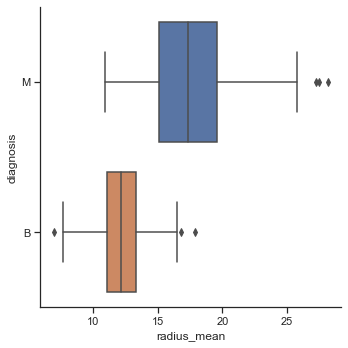

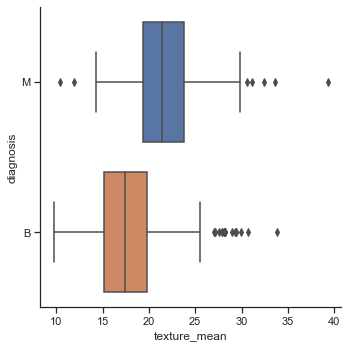

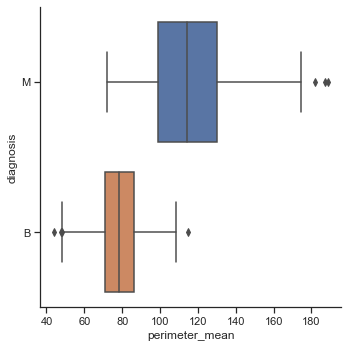

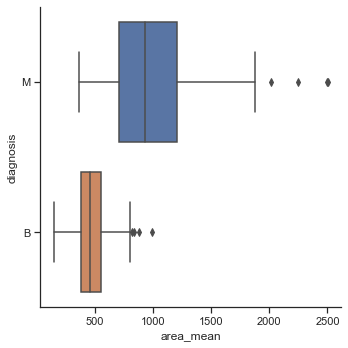

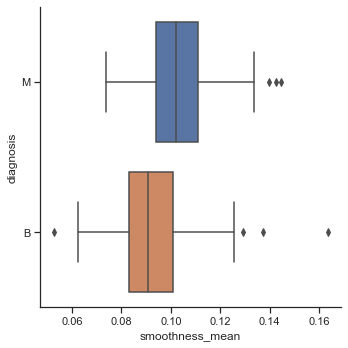

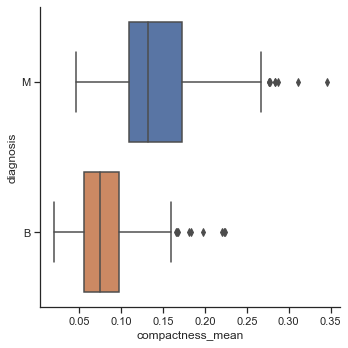

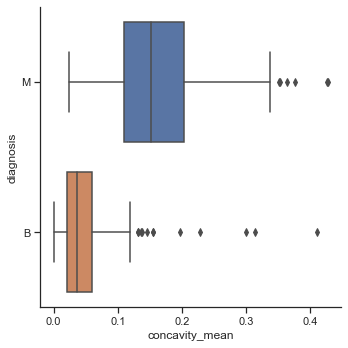

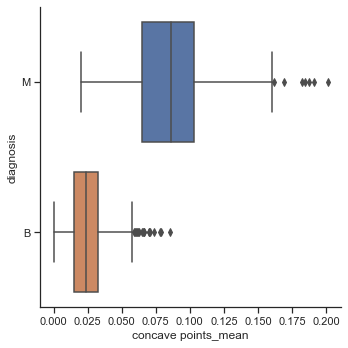

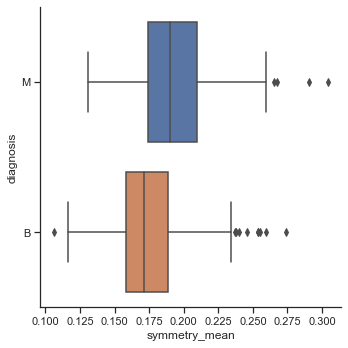

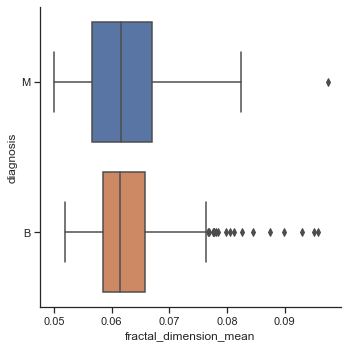

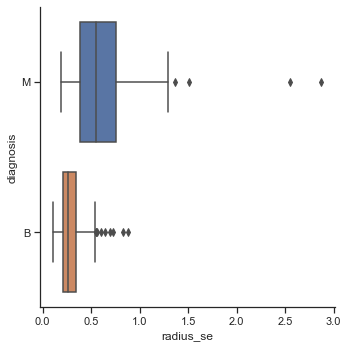

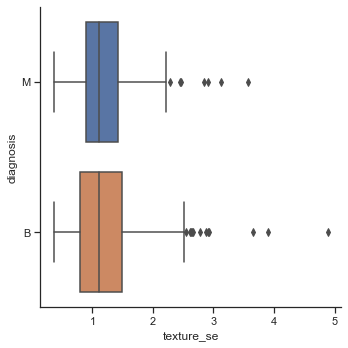

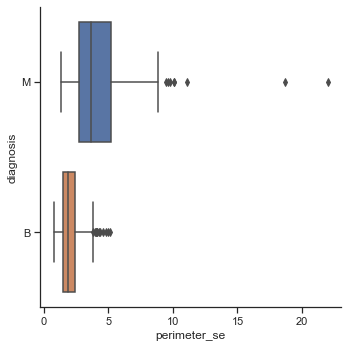

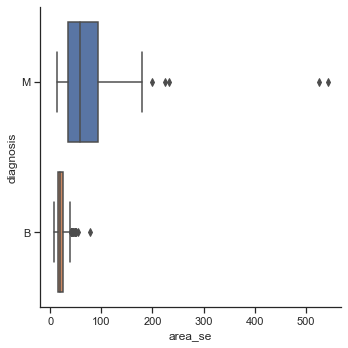

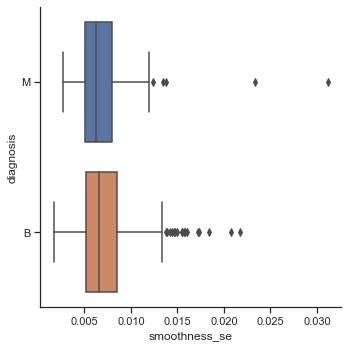

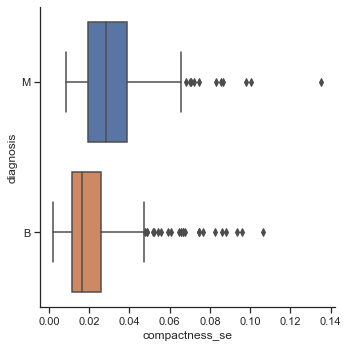

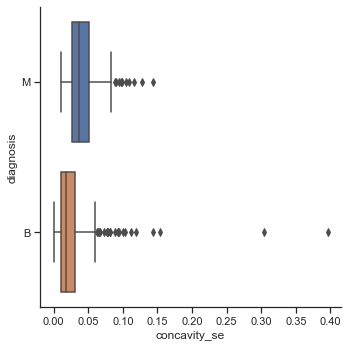

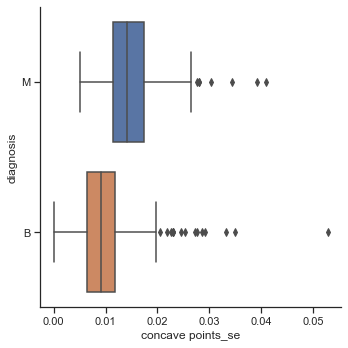

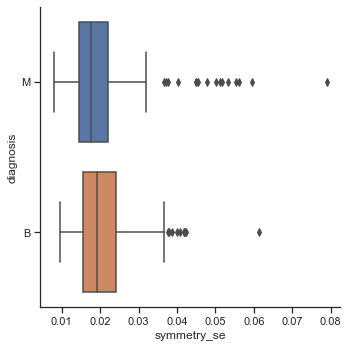

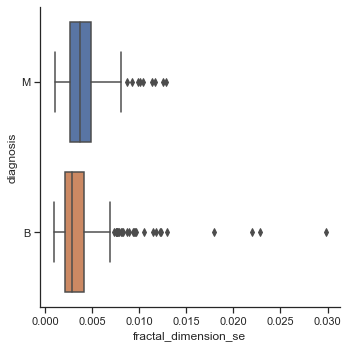

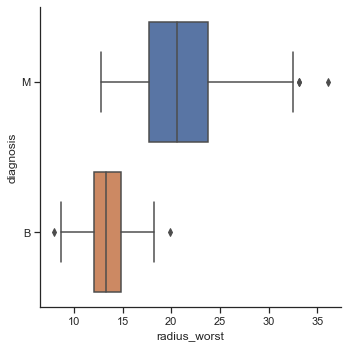

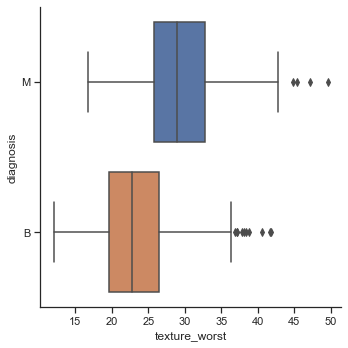

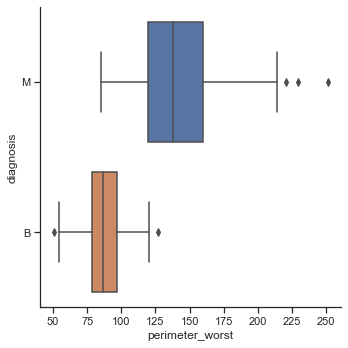

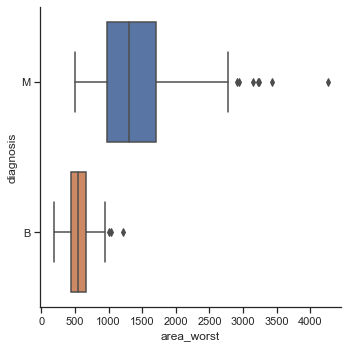

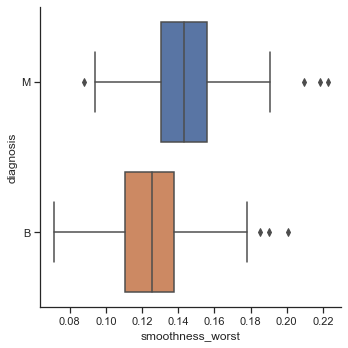

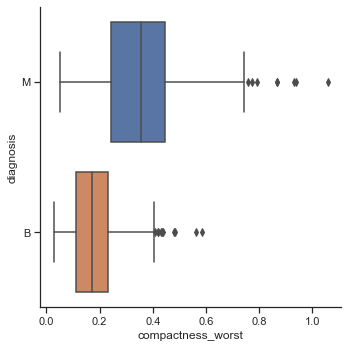

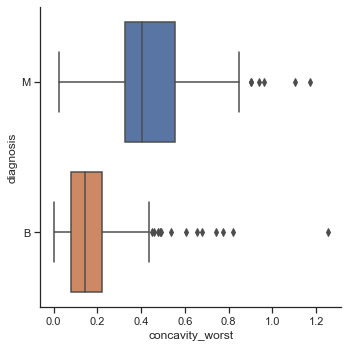

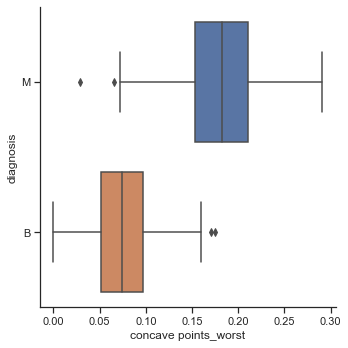

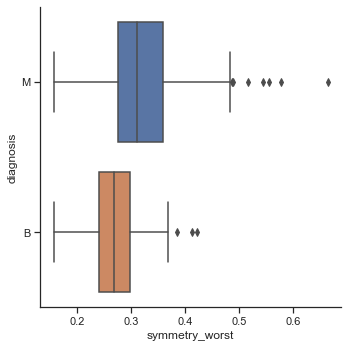

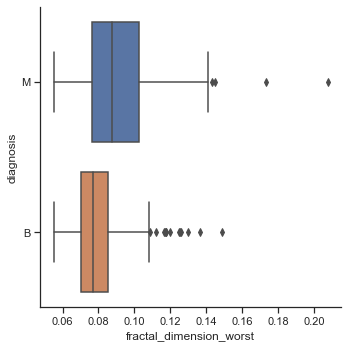

In [4]:
# Creamos una lista con las variables que tenemos
variables = list(df.columns.values)

# Eliminamos id, diagnosis y la última columna
del variables[0]
del variables[0]
del variables[-1]
variables

# Creamos un boxplot para cada variable
sns.set(style="ticks")
for variable in variables:
    g = sns.catplot(x=variable, y="diagnosis", kind="box", data=df)
    g

# Modelización

A simple vista, parece que hay diferencias entre la mayoría de las variables y si la célula es maligna o no. Sin embargo, hay un par de variables que parecen representar unas características muy similares entre los casos malignos y benignos: fractal dim mean, texture_se, smoothnes_se, symmetry_se, y fractal_dim_se. Podemos probar no incorporándolas en nuestro modelo.

Pasamos a crear nuestro modelo:

In [5]:
# Necesitamos transformar nuestra variable dependiente en 0 y 1
df2 = df
df2['diagnosis']= df2['diagnosis'].replace(['B','M'],[int(0),int(1)])

# Vamos a crear nuestras variables
y = df2['diagnosis']
X = df2[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se',  'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]



In [6]:
# Primero dividimos los datos en entrenamiento y testeo
# Dividimos los datos en un grupo de entrenamiento y uno de evaluación. Dejamos un 30% de los datos para evaluar el modelo
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
# Random_state nos creara una semilla aleatoria para tener el mismo resultado cada vez que corramos el codigo

<AxesSubplot:title={'center':'y_test'}>

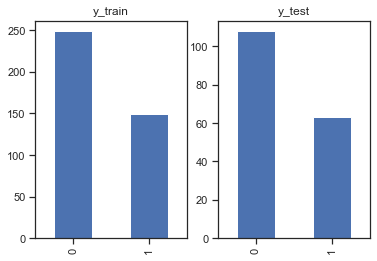

In [7]:
# Antes de continuar vamos a comprobar que nuestra semilla ha dejado una buena cantidad de positivos y negativos en cada uno de los grupos
fig, axes = plt.subplots(1, 2)
y_train.value_counts().plot(ax=axes[0], kind='bar',  title ="y_train")
y_test.value_counts().plot(ax=axes[1], kind='bar',  title ="y_test")

# Parece una distribución aceptable de casos malignos y benignos

In [8]:
# Definimos el algoritmo
Reg_logistica = LogisticRegression()

# Entrenamos el algoritmo
Reg_logistica.fit(x_train, y_train)

# Hacemos predicciones con nuestro algoritmo
prediccion = Reg_logistica.predict(x_test)

C:\Users\Jaime\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
prediccion

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

# Evaluación del modelo

Una vez generado nuestro modelo y predecir con el conjunto de testeo podemos evaluar como de bueno es nuestro modelo con las siguiente métricas disponibles: exactitud, precisión, sensibilidad, especifidad, F1.  

### Matriz de confusión:

Primero creamos nuestra matriz de confusión, un resumen de nuestras predicciones acertadas y fallidas

In [10]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, prediccion)

matriz

array([[102,   6],
       [  1,  62]], dtype=int64)

In [11]:
# Podemos hacer una mejor visualización de la matriz de confusión

pd.crosstab(y_test, prediccion)

col_0,0,1
diagnosis,,
0,102,6
1,1,62


Como vemos, hay un 102 celulas benignas identificadas correctamente y 6 clasificadas como malignas. Por el otr lado, tenemos 62 células malignas identificadas correctamente y 1 identificada como benigna. 

Observando la matriz de confusión podemos darnos cuenta de que es buen modelo para predecir células malignas. De todas formas, vamos a continuar evaluando las métricas de error. 


### Exactitud: 

La exactitud podemos definirla como la cantidad de predicciones correctas del modelo: 

Exactitud = (VP+VN)/(VP+VN+FP+FN)

VP: Verdadero positivo
VN: Verdadero negativo
FP: Falso positivo
FN: Falso negativo

In [12]:
# Creamos un diccionario vacio para nuestros resultados
Evaluaciones = {}

# Calculamos la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud =accuracy_score(y_test, prediccion)
print(exactitud)

# Lo incorporamos a nuestro diccionario
Evaluaciones["exactitud"] = exactitud

0.9590643274853801


### Precisión: 

La precisión evalua el desempeño de las identificaciones positivas: 

Precisión = VP/(VP+FP)


In [13]:
# Calculamos la Precisión del modelo
from sklearn.metrics import precision_score
precision =precision_score(y_test, prediccion)
print(precision)

# Lo incorporamos a nuestro diccionario
Evaluaciones["precision"] = precision

0.9117647058823529


### Sensibilidad: 

La sensibilidad (*recall*) es la cantidad de positivos identificados correctamente entre los positivos reales:

Sensibilidad = VP/(VP+FN)

In [14]:
# Calculamos la sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad =recall_score(y_test, prediccion)
print(sensibilidad)

# Lo incorporamos a nuestro diccionario
Evaluaciones["sensibilidad"] = exactitud

0.9841269841269841


Este modelo nos ha dado una sensibilidad muy alta. Esto es un resultado deseable, ya que refleja el error que menos nos interesa cometer (dar una celula maligna por beningna). Puede que sea lá métrica más importante para evaluar nuestro modelo en este caso. 

### Especifidad: 

Es la tasa negativa verdadera:

Especifidad = VN/(VN+FP)

In [15]:
# No se encuentra en la métricas de sklearn, pero podemos calcularlo a mano:

VN = 102
FP = 1
Especifidad = VN/(VN+FP)

# Lo incorporamos a nuestro diccionario
Evaluaciones["especifidad"] = Especifidad

### F1:

Es una medida que evalua en conjunto la precision y la sensibilidad

F1= 2(precision+sensibilidad)/(precision+sensibilidad)

In [16]:
# Calculamos la exactitud del modelo
from sklearn.metrics import f1_score
F1 =f1_score(y_test, prediccion)
print(F1)

# Lo incorporamos a nuestro diccionario
Evaluaciones["F1"] = F1

0.9465648854961831


In [17]:
# Vamos a ver nuestras métricas: 
Evaluaciones

{'exactitud': 0.9590643274853801,
 'precision': 0.9117647058823529,
 'sensibilidad': 0.9590643274853801,
 'especifidad': 0.9902912621359223,
 'F1': 0.9465648854961831}

En lineas generales tenemos unos buenos resultados, las métricas superan todas el 90%, lo que quiere decir que es un modelo que predice bastante bien nuestros datos. Sin embargo, como deciamos más arriba, un error en nuestro modelo puede signifar la vida o la muerte. Por lo que lo más deseable sería encontrar un modelo que fuese aun más preciso con nuestra clasificación de las celulas en malignas o benignas. 